### Python_NeuralNetwork

In [31]:
# python notebook for Make Your Own Neural Network
# code for 3-layer neural network, and code for learning the MNIST dataset
# 20190603

In [32]:
import numpy as np
import matplotlib.pyplot as plt
# scipy.special for the sigmoid function expit()
import scipy.special as special
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [33]:
# neural network class definition
class neuralNetwork(object):
    
    # initialise the neural network
    def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate=0.5):
        # set number of nodes in each input, hidden, output layer
        self.iNodes = inputNodes
        self.hNodes = hiddenNodes
        self.oNodes = outputNodes
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in 
        # the next layer
        # w11 w21
        # w12 w22 etc
        # pow(x, y), 返回x的y次方
        self.wih = np.random.normal(0.0, pow(self.hNodes, -0.5), (self.hNodes, self.iNodes))
        self.who = np.random.normal(0.0, pow(self.oNodes, -0.5), (self.oNodes, self.hNodes))
        # learning rate
        self.lr = learningRate
        # activation function is the sigmoid function
        # lambda x: special.expit(x)  表示接受x,返回special.expit(x)函数
        self.activation_function = lambda x: special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (targets - final_outputs)
        output_errors = (targets - final_outputs)
        
        # hidden layer error is the output_errors, split by weights, recombined at 
        # hidden nodes
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        # np.transpose(a)  表示矩阵a的转秩
        self.who += self.lr * np.dot(output_errors * final_outputs * 
                                     (1.0 - final_outputs), np.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * np.dot(hidden_errors * hidden_outputs *
                                    (1.0 - hidden_outputs), np.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        # ndmin=2 表示指定最小维数为2
        # .T 表示矩阵的转秩
        inputs = np.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = np.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    

In [44]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.3

# creat instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)


In [45]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [46]:
# train the neural network
# go through all recordes in the training data set
final_training_data = []
for record in training_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    # train Model
    final_training_data.append([inputs, targets])
    pass

In [21]:
type(final_training_data)
len(final_training_data)
final_training_data[0][1]

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

In [47]:
# train Model
for i in range(len(final_training_data)):
    n.train(final_training_data[i][0], final_training_data[i][1])

In [48]:
# load the minist test data CSV file into  a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [49]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


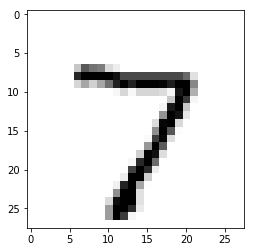

In [50]:
image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [51]:
test_data = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
n.query(test_data)

array([[1.39435962e-03],
       [7.78537225e-04],
       [7.81423269e-03],
       [8.62038086e-04],
       [2.72099887e-03],
       [3.42608985e-04],
       [3.52316561e-04],
       [9.93929993e-01],
       [2.52098229e-04],
       [1.15758078e-03]])